In [34]:
%matplotlib inline

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
PRED_RES_FILE = "predict_results.json"

In [37]:
df_all = pd.read_json(PRED_RES_FILE)

In [46]:
df_all

,avg_rmse,data_file,hidden_size,model_name,model_timestamp,pred_score,process_dim,std_rmse,var_mse
0,4.691359,../data/simulated/hawkes_synthetic_exp_2d_2018...,128,HawkesDecayRNN,20181209-153942,0.543333,2,0.251297,2829.415253
1,5.024230,../data/simulated/hawkes_synthetic_exp_2d_2018...,128,HawkesLSTM,20181209-154233,0.518333,2,0.401749,4844.353941


In [39]:
df_ = df_all[df_all.process_dim == 2]

In [40]:
labels = df_.model_name.values

In [41]:
means = df_.avg_rmse.values

In [42]:
stds = df_.std_rmse.values

In [43]:
yerr = 3*stds

In [48]:
scores = df_.pred_score.values

Text(0, 0.5, 'Précision, prédiction du type $k$')

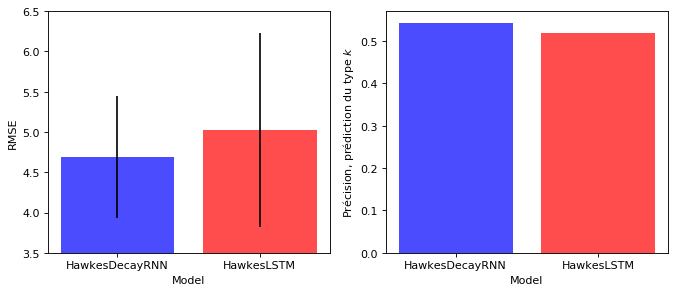

In [51]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,4), dpi=80)
ax0.bar(range(len(means)), means, alpha=0.7,
        yerr=yerr, color=['blue', 'red'])
ax0.set_xlabel("Model")
ax0.set_xticks(range(len(means)))
ax0.set_xticklabels(labels)
ax0.set_ylabel("RMSE")
ax0.set_ylim((3.5, 6.5))

ax1.bar(range(len(means)), scores, alpha=0.7,
        color=['blue', 'red'])
ax1.set_xlabel("Model")
ax1.set_xticks(range(len(means)))
ax1.set_xticklabels(labels)
ax1.set_ylabel("Précision, prédiction du type $k$")

In [52]:
import datetime
now = datetime.datetime.now()

In [53]:
now_timestamp = now.strftime("%Y%m%d-%H%M%S")
print(now_timestamp)

20181209-172023


In [54]:
fig.savefig('../results/2D_Hawkes_Data_RMSE_{}.pdf'
            .format(now_timestamp))